# Importing libraries

In [26]:
import random

import numpy as np
import pandas as pd

In [27]:
import plotly.express as px
from plotly import graph_objects as go

# Creating data

In [28]:
N_SAMPLES = 2500

In [29]:
list_funnel = ["FUNNEL {}".format(str(np.random.randint(0, 7))) for _ in range(N_SAMPLES)]
list_index_location = random.sample(range(10000), N_SAMPLES)

In [30]:
dict_type_funnel = {"FUNNEL 1": "Potencial Encerramento",
                    "FUNNEL 2": "Ags Reformadas (PD + EI)",
                    "FUNNEL 3": "Remanejamento (Imóvel antigo)",
                    "FUNNEL 4": "AVCB Crítico",
                    "FUNNEL 5": "Itaú Rent",
                    "FUNNEL 6": "Ags que serão reformadas (PD + EI)",
                    "PD": "Saldo PD"}

## Renaming class: 'funell 0' to ''

In [31]:
list_funnel_updated = ["PD" if value == "FUNNEL 0" else value for value in list_funnel]

In [32]:
df = pd.DataFrame({"LOCATION": list_index_location, "GROUP FUNNEL": list_funnel_updated})

In [33]:
df['GROUP FUNNEL LABEL'] = df['GROUP FUNNEL'].replace(dict_type_funnel)

## Creating groupby by 'group funnel'

In [34]:
df_groupby_count_funnel = df.groupby(["GROUP FUNNEL", "GROUP FUNNEL LABEL"]).size().reset_index(name="QUANTIDADE")

In [35]:
df_groupby_count_funnel

,GROUP FUNNEL,GROUP FUNNEL LABEL,QUANTIDADE
0,FUNNEL 1,Potencial Encerramento,358
1,FUNNEL 2,Ags Reformadas (PD + EI),350
2,FUNNEL 3,Remanejamento (Imóvel antigo),337
3,FUNNEL 4,AVCB Crítico,353
4,FUNNEL 5,Itaú Rent,374
5,FUNNEL 6,Ags que serão reformadas (PD + EI),364
6,PD,Saldo PD,364


# Funnel 1

In [36]:
update_figure_size = True
update_legend = True
update_title =True

In [37]:
# CHOOSING COLORS
colors = ["#f94144", "#f3722c", "#f8961e", "#f9c74f", "#90be6d", "#43aa8b", "#577590"]

# CREATING FIGURE
fig = go.Figure(go.Funnelarea(
                values=df_groupby_count_funnel["QUANTIDADE"],
                text=df_groupby_count_funnel["GROUP FUNNEL"],
                textposition = "inside",
                labels=df_groupby_count_funnel["GROUP FUNNEL LABEL"],
                hovertemplate='<b>%{text}</b><br>' +
                              '<b>%{label}</b><br>' +
                              '<b>%{value}</b><br>' +
                              '<b>%{percent}</b>',
                textinfo = "value+label+percent",
                textfont = {"family": "Arial, serif", "color": "black"}, opacity = 0.95,
                marker=dict(colors=colors)))

if update_legend:

  # UPDATING LEGEND
  fig.update_layout(legend_title_text="Classification - Funnel - PD")
  fig.update_yaxes(title_text="Classification - Funnel - PD")

  fig.update_layout(legend=dict(
      yanchor="top",
      y=0.99,
      xanchor="left",
      x=0.90,
      font=dict(family="Rockwell",
                                  size=16,
                                  color="black")
                    )
    )

if update_title:

  # UPDATING TITLE
  fig.update_layout(
      font_family="Arial",
      font_color="black",
      title_font_family="Times New Roman",
      title_font_color="black",
      title_font_size=30,
      legend_title_font_color="black"
  )

  fig.update_layout(
      title={
          'text': "Funnel - PD",
          'x': 0.50,
          'xanchor': 'center',
          'yanchor': 'top'})

  fig.update_traces(textposition='inside',
                    textfont=dict(family="Rockwell",
                                  size=20,
                                  color="white")
                    )

# UPDATING HOVER
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)

if update_figure_size:

  # UPDATING FIGURE SIZE
  fig.update_layout(
      autosize=True,
      width=1300,
      height=600,
      margin=dict(
          l=300,
          r=300,
          b=100,
          t=100,
          pad=1
      ),
      paper_bgcolor="white",
  )

  fig.update_yaxes(automargin=False)

fig.show()

# Funnel 2

In [38]:
df_groupby_count_funnel.sort_values(by="QUANTIDADE", ascending=False)

,GROUP FUNNEL,GROUP FUNNEL LABEL,QUANTIDADE
4,FUNNEL 5,Itaú Rent,374
5,FUNNEL 6,Ags que serão reformadas (PD + EI),364
6,PD,Saldo PD,364
0,FUNNEL 1,Potencial Encerramento,358
3,FUNNEL 4,AVCB Crítico,353
1,FUNNEL 2,Ags Reformadas (PD + EI),350
2,FUNNEL 3,Remanejamento (Imóvel antigo),337


In [39]:
fig = px.funnel(df_groupby_count_funnel.sort_values(by="QUANTIDADE", ascending=False),
                y='GROUP FUNNEL LABEL', x='QUANTIDADE', color='GROUP FUNNEL',
                template="simple_white",
                title='Beskar Forging Services Inc.',
                labels={"Stage": ""})
fig.show()

# Dot point - 1

In [ ]:
fig = go.Figure()

for classification_funnel in df["GROUP FUNNEL"].unique():

  df_filter = df[df["GROUP FUNNEL"] == classification_funnel]

  fig.add_trace(go.Scatter(
      x=df_filter["LOCATION"],
      y=df_filter["GROUP FUNNEL LABEL"],
      name='Points - PD',
      marker=dict(
          color='rgba(156, 165, 196, 0.95)',
          line_color='rgba(156, 165, 196, 1.0)',
      ),
  ))

  fig.update_traces(mode='markers', marker=dict(line_width=1, symbol='circle', size=5))

  fig.update_layout(
      title="Classification - PD - {}".format(classification_funnel),
      xaxis=dict(
          showgrid=False,
          showline=True,
          linecolor='rgb(102, 102, 102)',
          tickfont_color='rgb(102, 102, 102)',
          showticklabels=True,
          dtick=10,
          ticks='outside',
          tickcolor='rgb(102, 102, 102)',
      ),
      margin=dict(l=140, r=40, b=50, t=80),
      legend=dict(
          font_size=10,
          yanchor='middle',
          xanchor='right',
      ),
      width=800,
      height=600,
      paper_bgcolor='white',
      plot_bgcolor='white',
      hovermode='closest',
  )

fig.show()

# Pictogram

In [16]:
dict_users = {'Regular': 62, 'New': 20, 'Churned': 16, 'Suspended': 2}
df = pd.Series(dict_users)

In [17]:
df

Regular      62
New          20
Churned      16
Suspended     2
dtype: int64

In [18]:
num_rows = 10
row = 0
column = 0
data = []
colors_list = ['slateblue', 'limegreen', 'red', 'grey']
colors = {df.index[i]:colors_list[i] for i in range(len(df))}
for category, count in df.iteritems():
    rows = []
    columns = []
    for _ in range(count):
        if row == num_rows:
            row = 0
            column += 1
        rows.append(row)
        columns.append(column)
        row += 1
    data.append(go.Scatter(x=rows, y=columns, mode='markers',
                           marker={'color': colors[category], 'symbol': 'star', 'size': 20},
                           name=category))
fig = go.Figure(dict(data=data, layout=go.Layout(plot_bgcolor='white',
                                                 xaxis=dict(visible=False),
                                                 yaxis=dict(visible=False))))
fig.update_layout(title='User dynamics in July 2021', title_x=0.45, title_y=0.85, font=dict(size=18))
fig.show()

<ipython-input-18-7462a1ec5211>:7: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



# Pictogram with PyWaffle

In [19]:
!pip install pywaffle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 42.7 MB/s eta 0:00:00


In [20]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

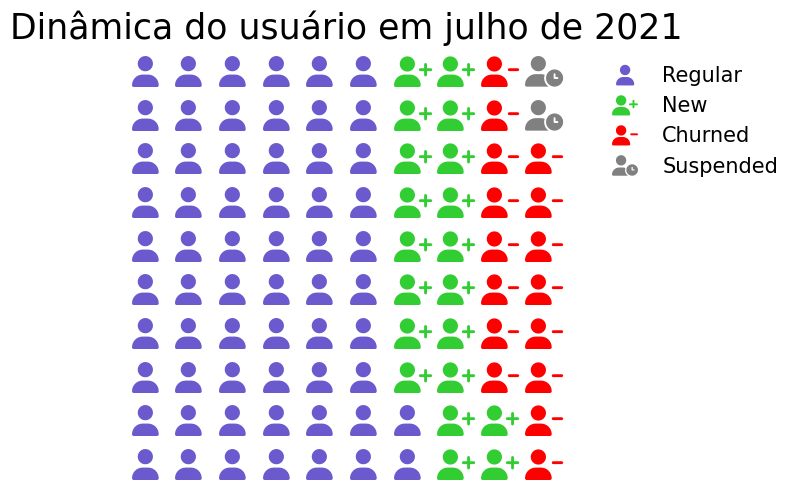

In [21]:
fig = plt.figure(FigureClass=Waffle,
                 figsize=(10,5),
                 values=dict_users,
                 rows=10,
                 colors=list(colors.values()),
                 icons=['user','user-plus', 'user-minus', 'user-clock'],
                 font_size=22,
                 icon_legend=True,
                 legend={'bbox_to_anchor': (1.55, 1), 'fontsize': 15, 'frameon': False})
plt.title ('Dinâmica do usuário em julho de 2021', fontsize=25)
plt.show()

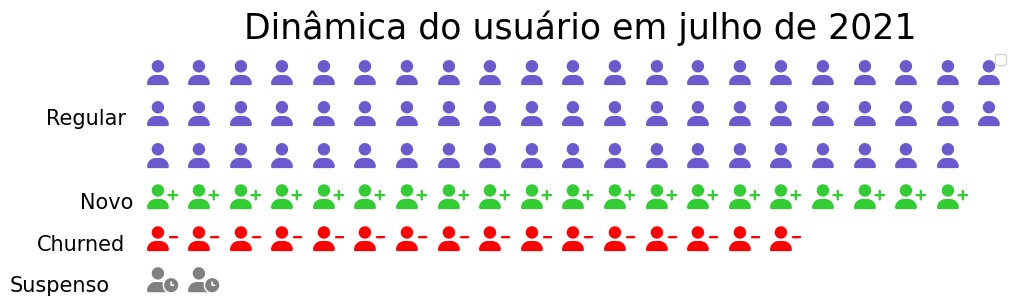

In [22]:
fig = plt.figure(FigureClass=Waffle,
                 figsize=(9,7),
                 values=dict_users,
                 columns=21,
                 vertical=True,
                 starting_location='NW',
                 block_arranging_style='new-line',
                 colors=list(colors. values()),
                 icons=['user','user-plus', 'user-minus', 'user-clock'],
                 font_size=
                 18)
plt.title('Dinâmica do usuário em julho de 2021', fontsize=25 )
fig.text(x=-0.095, y=0.562, s='Regular', fontsize=15)
fig.text(x=-0.057, y=0.441, s='Novo', fontsize=15)
fig.text (x=-0.105, y=0.382, s='Churned', fontsize=15)
fig.text(x=-0.135, y=0.323, s='Suspenso', fontsize=15)
plt.legend([])
plt.show()

# Waffle chart with Plotly

In [23]:
m= 6
n= 10
z = np.ones((m, n))
z[2:, 7] = 2
z[:4, 8] = 2
z[0, 9] = 2
z[1:, 9] = 3

#dictionary that maps the heatmap z-values to strings
d = {1: "Liberal",
    2: "Conservative",
    3: "New Wave",
    }
M = max([len(s) for s in d.values()])
customdata= np.empty((m,n), dtype=f'<U{M}')  #supplementary information on each waffle cell

for i in range(m):
    for j in range(n):
        customdata[i,j] = d[z[i, j]]

In [24]:
customdata

array([['Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal',
        'Liberal', 'Liberal', 'Conservative', 'Conservative'],
       ['Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal',
        'Liberal', 'Liberal', 'Conservative', 'New Wave'],
       ['Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal',
        'Liberal', 'Conservative', 'Conservative', 'New Wave'],
       ['Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal',
        'Liberal', 'Conservative', 'Conservative', 'New Wave'],
       ['Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal',
        'Liberal', 'Conservative', 'Liberal', 'New Wave'],
       ['Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal',
        'Liberal', 'Conservative', 'Liberal', 'New Wave']], dtype='<U12')

In [25]:
#Normalizing the three possible z-values we get 1/3, 2/3, 1;
# define a discrete colorscale that maps 1/3, 2/3, 1 to distinct colors:
colorscale = [[0, "#00cc96"],
              [0.33, "#00cc96"],
              [0.33, "#636efa"],
              [0.66,  "#636efa"],
              [0.66, "#e763fa" ],
              [1, "#e763fa"]]

xlabels = ['Acu', 'Hku', 'Hga', 'Aeo', 'Rlw', 'Eqh', 'Qrx', 'Twu', 'Mvq', 'Xnl']
ylabels = ['Cqu', 'Hcv', 'Ijp', 'Vio', 'Wmt', 'Ljf']


fig = go.Figure(go.Heatmap(x=xlabels, y = ylabels, z=z,
                           customdata=customdata, xgap=3, ygap=3,
                           colorscale=colorscale, showscale=False,
                           hovertemplate="(%{y}, %{x}): %{customdata})<extra></extra>"))
fig.update_layout(width=600, height=450, yaxis_autorange='reversed')